In [72]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# load dataset
pima = pd.read_csv("speedDating_trab.csv")

pima


,Unnamed: 0,id,partner,age,age_o,goal,date,go_out,int_corr,length,met,like,prob,match
0,1,1.0,1,21.0,27.0,2.0,7.0,1.0,0.14,2.0,1.0,7.0,6.0,0
1,2,1.0,2,21.0,22.0,2.0,7.0,1.0,0.54,2.0,1.0,7.0,5.0,0
2,3,1.0,3,21.0,22.0,2.0,7.0,1.0,0.16,2.0,1.0,7.0,NaN,1
3,4,1.0,4,21.0,23.0,2.0,7.0,1.0,0.61,2.0,1.0,7.0,6.0,1
4,5,1.0,5,21.0,24.0,2.0,7.0,1.0,0.21,2.0,1.0,6.0,6.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,8374,22.0,18,25.0,26.0,1.0,2.0,1.0,0.64,1.0,0.0,2.0,5.0,0
8374,8375,22.0,19,25.0,24.0,1.0,2.0,1.0,0.71,1.0,0.0,4.0,4.0,0
8375,8376,22.0,20,25.0,29.0,1.0,2.0,1.0,-0.46,1.0,0.0,6.0,5.0,0
8376,8377,22.0,21,25.0,22.0,1.0,2.0,1.0,0.62,1.0,0.0,5.0,5.0,0


In [73]:
pima.isnull().sum()


Unnamed: 0      0
id              1
partner         0
age            95
age_o         104
goal           79
date           97
go_out         79
int_corr      158
length        915
met           375
like          240
prob          309
match           0
dtype: int64

In [74]:
#estratégia de droppar todos os NAN
pima=pima.dropna()

In [75]:
#convertemos de float para int
pima[['prob','like','met','length','go_out','date','goal','age_o','age','id']]=  pima[['prob','like','met','length','go_out','date','goal','age_o','age','id']].astype(int)

pima.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6878 entries, 0 to 8376
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  6878 non-null   int64  
 1   id          6878 non-null   int64  
 2   partner     6878 non-null   int64  
 3   age         6878 non-null   int64  
 4   age_o       6878 non-null   int64  
 5   goal        6878 non-null   int64  
 6   date        6878 non-null   int64  
 7   go_out      6878 non-null   int64  
 8   int_corr    6878 non-null   float64
 9   length      6878 non-null   int64  
 10  met         6878 non-null   int64  
 11  like        6878 non-null   int64  
 12  prob        6878 non-null   int64  
 13  match       6878 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 806.0 KB
/home/catarina/.local/lib/python3.6/site-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

In [76]:
#numero de 1's
print("% 1's:",pima['match'].mean())
print("% 0's:", 1-pima['match'].mean())


% 1's: 0.17112532712997963
% 0's: 0.8288746728700204


In [77]:
pima.isnull().sum()

Unnamed: 0    0
id            0
partner       0
age           0
age_o         0
goal          0
date          0
go_out        0
int_corr      0
length        0
met           0
like          0
prob          0
match         0
dtype: int64

In [78]:
pima.head(10)

,Unnamed: 0,id,partner,age,age_o,goal,date,go_out,int_corr,length,met,like,prob,match
0,1,1,1,21,27,2,7,1,0.14,2,1,7,6,0
1,2,1,2,21,22,2,7,1,0.54,2,1,7,5,0
3,4,1,4,21,23,2,7,1,0.61,2,1,7,6,1
4,5,1,5,21,24,2,7,1,0.21,2,1,6,6,1
5,6,1,6,21,25,2,7,1,0.25,2,1,6,5,0
6,7,1,7,21,30,2,7,1,0.34,2,1,6,5,0
8,9,1,9,21,28,2,7,1,0.28,2,1,7,7,1
9,10,1,10,21,24,2,7,1,-0.36,2,1,6,6,0
10,11,2,1,24,27,1,5,1,0.29,2,1,6,4,0
11,12,2,2,24,22,1,5,1,0.18,2,1,7,3,0


In [79]:
pima = pima.drop('int_corr',1)

#divisao do casos em q tem match e os q n tem match
resultados = pima['match']
dados = pima.drop(['match'],axis=1)


# Split dataset into training set and test set (30%/70%)
dados_treino, dados_teste, resultados_treino, resultados_teste= train_test_split( dados, resultados, test_size=0.3,random_state=1)

In [80]:
#ID3 COM ENTROPIA
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy")

# Train Decision Tree Classifer
clf = clf.fit(dados_treino, resultados_treino)

#Predict the response for test dataset
predicted_test = clf.predict(dados_teste)

In [81]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(resultados_teste, predicted_test))

#print("Mean Absolute Error:",mae(resultados_teste,clf.predict(dados_teste)))

#print("Mean Squared Error:",mse(resultados_teste,clf.predict(dados_teste),squared=False))

print("Matriz de confusão:\n",confusion_matrix(resultados_teste, clf.predict(dados_teste)))

print(classification_report(resultados_teste, clf.predict(dados_teste)))


Accuracy: 0.7688953488372093
Matriz de confusão:
 [[1458  237]
 [ 240  129]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1695
           1       0.35      0.35      0.35       369

    accuracy                           0.77      2064
   macro avg       0.61      0.60      0.61      2064
weighted avg       0.77      0.77      0.77      2064



In [82]:
kf = KFold(n_splits=7,shuffle=False)
kf.split(dados)

scores=cross_val_score(DecisionTreeClassifier(), dados, resultados, cv=7, scoring='accuracy')
print("Cross Validation:", scores)
print("The mean value for K-fold cross validation test that best explains our model is {}".format(scores.mean()),"\n")

# Initialize the array to zero which will store the confusion matrix
array = [[0,0],[0,0]]
print("MATRIZ DE CONFUSÃO DE CADA K-FOLD:")
# For each train-test split: train, predict and compute the confusion matrix
for train_index, test_index in kf.split(dados):
    # Train test split
    dados_treino, dados_teste = dados.iloc[train_index], dados.iloc[test_index]
    resultados_treino, resultados_teste = resultados.iloc[train_index], resultados.iloc[test_index]
    # Train the model
    model = clf.fit(dados_treino, resultados_treino)
    # Calculate the confusion matrix
    score=confusion_matrix(resultados_teste, model.predict(dados_teste))
    print(score )
    c = score
    # Add the score to the previous confusion matrix of previous model
    array = array + c

Cross Validation: [0.73143438 0.61851475 0.66734486 0.80264496 0.73319756 0.71995927
 0.75356415]
The mean value for K-fold cross validation test that best explains our model is 0.7180942771366948 

MATRIZ DE CONFUSÃO DE CADA K-FOLD:
[[659 167]
 [101  56]]
[[657 124]
 [138  64]]
[[631 190]
 [ 91  71]]
[[725 108]
 [111  39]]
[[666 147]
 [116  53]]
[[694 115]
 [131  42]]
[[686 132]
 [135  29]]


In [83]:
#NAIVE BAYES
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(dados_treino,resultados_treino)

#Predict the response for test dataset
predicted3 = gnb.predict(dados_teste)
print("Accuracy:",metrics.accuracy_score(resultados_teste, predicted3))


#print("Mean Absolute Error:",mae(resultados_teste,gnb.predict(dados_teste)))

#print("Mean Squared Error:",mse(resultados_teste,gnb.predict(dados_teste),squared=False))

print("Matriz de confusão:\n",confusion_matrix(resultados_teste, gnb.predict(dados_teste)))

print(classification_report(resultados_teste,gnb.predict(dados_teste)))


Accuracy: 0.8340122199592668
Matriz de confusão:
 [[788  30]
 [133  31]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       818
           1       0.51      0.19      0.28       164

    accuracy                           0.83       982
   macro avg       0.68      0.58      0.59       982
weighted avg       0.80      0.83      0.80       982



In [84]:
kf = KFold(n_splits=7,shuffle=False)
kf.split(dados)

scores=cross_val_score(GaussianNB(), dados, resultados, cv=7, scoring='accuracy')
print("Cross Validation:", scores)
print("The mean value for K-fold cross validation test that best explains our model is {}".format(scores.mean()),"\n")

# Initialize the array to zero which will store the confusion matrix
array = [[0,0],[0,0]]
print("MATRIZ DE CONFUSÃO DE CADA K-FOLD:")
# For each train-test split: train, predict and compute the confusion matrix
for train_index, test_index in kf.split(dados):
    # Train test split
    dados_treino, dados_teste = dados.iloc[train_index], dados.iloc[test_index]
    resultados_treino, resultados_teste = resultados.iloc[train_index], resultados.iloc[test_index]
    # Train the model
    model = gnb.fit(dados_treino, resultados_treino)
    # Calculate the confusion matrix
    score=confusion_matrix(resultados_teste, model.predict(dados_teste))
    print(score )
    c = score
    # Add the score to the previous confusion matrix of previous model
    array = array + c

Cross Validation: [0.79755849 0.83418108 0.78128179 0.81993896 0.83197556 0.80753564
 0.82892057]
The mean value for K-fold cross validation test that best explains our model is 0.8144845853468817 

MATRIZ DE CONFUSÃO DE CADA K-FOLD:
[[728  98]
 [100  57]]
[[743  38]
 [143  59]]
[[714 107]
 [112  50]]
[[800  33]
 [129  21]]
[[782  31]
 [133  36]]
[[729  80]
 [112  61]]
[[788  30]
 [133  31]]


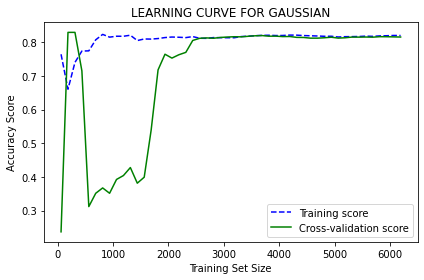

In [85]:

# Obtain scores from learning curve function
# cv is the number of folds while performing Cross Validation
sizes, training_scores, testing_scores = learning_curve(GaussianNB(), dados, resultados, cv=10, scoring='accuracy', train_sizes=np.linspace(0.01, 1.0, 50))
  
# Mean and Standard Deviation of training scores
mean_training = np.mean(training_scores, axis=1)
Standard_Deviation_training = np.std(training_scores, axis=1)
  
# Mean and Standard Deviation of testing scores
mean_testing = np.mean(testing_scores, axis=1)
Standard_Deviation_testing = np.std(testing_scores, axis=1)
  
# dotted blue line is for training scores and green line is for cross-validation score
plt.plot(sizes, mean_training, '--', color="b",  label="Training score")
plt.plot(sizes, mean_testing, color="g", label="Cross-validation score")
  
# Drawing plot
plt.title("LEARNING CURVE FOR GAUSSIAN")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()